# Rutinas para graficar el dominio y el codominio de una trasnformación matricial en $\mathbb{R}^2$ y en $\mathbb{R}^3$ 

In [1]:
%pylab inline
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import animation,rc
pylab.rcParams['figure.figsize'] = (10, 4)
import sympy as sp
import math



fps=2
segundos=2


# Rutinas para la anomación
def dibujo():    
    return fig,    
   
def animaciones_paso_3d(axs,fig,angulo):
    for ax in axs:
        ax.view_init(elev=10., azim=angulo)
    return fig, 

def animaciones3d(fig,axs,dibujo=dibujo, fps=fps, segundos=segundos):
    plt.close(fig)
    rc('animation', html='jshtml')
    frames=fps*segundos
    return animation.FuncAnimation(fig, lambda i : animaciones_paso_3d(axs,fig,i/frames*90), init_func=dibujo,
                               frames=frames, interval=int(1000/fps), blit=True)

# Dibuja un plano en 3D
def plano3d(ax,u,v,color='k',**kwargs):
    x_min,x_max=ax.get_xlim()
    y_min,y_max=ax.get_ylim()
    det=u[0]*v[1]-u[1]*v[0]
    kx=(v[1]*u[2]-u[1]*v[2])/det
    ky=-(v[0]*u[2]-u[0]*v[2])/det

    xx=[[x_min,x_max],[x_min,x_max]]
    yy=[[y_min,y_min],[y_max,y_max]]
    zz=np.array([[kx*x_min+ky*y_min,kx*x_max+ky*y_min],[kx*x_min+ky*y_max,kx*x_max+ky*y_max]]).astype(np.float64)

    ax.plot_surface(xx, yy, zz, alpha=0.2)

ejes_min=0
ejes_max=2
    
    
#Determina si es 2D o 3D, dibuja los puntos y devuelve el respectivo ax
def subgrf(fig,graf,puntos,parametros):
    if puntos.rows==2:
        print('1')
        ax=fig.add_subplot(graf)
        #ejes2d(ax1,parametros1)
    elif puntos.rows==3:
        print('2')
        ax=fig.add_subplot(graf,projection='3d')
        ax.set_zlim(ejes_min,ejes_max)
        #ejes3d(ax1,parametros1)
    else:
        assert True, 'puntos1 debe tener 2 o 3 renglones'
    ax.set_xlim(ejes_min,ejes_max)
    ax.set_ylim(ejes_min,ejes_max)
    plt.plot(*np.array(puntos),color='black')
    return ax

#Asigna los dos subplots
def transf(puntos1:sp.Matrix,
           puntos2:sp.Matrix,
           parametros1:dict=None,
           parametros2:dict=None):#x0=0,y0=0,z0=0,x1=2,y1=2,z1=2):#x0=-1.5,y0=-1.5,z0=-1.5,x1=1.5,y1=1.5,z1=1.5):
    
    fig=plt.figure()
    #Crea ejes del sublot izquierdo
    ax1=subgrf(fig,121,puntos1,parametros1)
    ax2=subgrf(fig,122,puntos2,parametros2)
    return fig,ax1,ax2
    
    
    
casa_puntos=sp.Matrix([[0. , 0. , 0., 1. , 1 , 0. ],
                [0. , 1. , 1.5, 1. , 0. , 0. ]])


casa=sp.Matrix([[0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],       
                [0.0, 1.0, 1.5, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0]])

cubo_puntos=sp.Matrix([[0., 0., 0., 0., 1., 1., 1., 1.],
                [0., 0., 1., 1., 0., 0., 1., 1.],
                [0., 1., 0., 1., 0., 1., 0., 1.]])


cubo=sp.Matrix([[0.0,  0.0,  1.0,  1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  1.0,  1.0,  1.0,  1.0,  1.0,  1.0,  0.0], 
                [0.0,  1.0,  1.0,  0.0,  0.0,  0.0,  1.0,  1.0,  1.0,  1.0,  1.0,  1.0,  0.0,  0.0,  0.0,  0.0], 
                [0.0,  0.0,  0.0,  0.0,  0.0,  1.0,  1.0,  0.0,  1.0,  1.0,  0.0,  1.0,  1.0,  0.0,  1.0,  1.0]])


Populating the interactive namespace from numpy and matplotlib


# Ejemplo

In [6]:
A=sp.Matrix([[0.5, 0 , 1 ],
             [0, .6 , .3 ],
             [0, .8 , .4 ]
             ])
A

Matrix([
[0.5,   0,   1],
[  0, 0.6, 0.3],
[  0, 0.8, 0.4]])

In [7]:
fig,ax1,ax2=transf(cubo,A*cubo)
plano3d(ax2,A[:,0],A[:,1],color='k')
animaciones3d(fig,(ax1,ax2)) 

2
2


# Ejemplo

In [8]:
A=sp.Matrix([[0.7,0   ],
             [0  ,0.7 ],
             [0  ,0.7 ],
             ])

A

Matrix([
[0.7,   0],
[  0, 0.7],
[  0, 0.7]])

In [9]:
A*casa

Matrix([
[0, 0.7,    0,   0, 0.7, 0.7,   0, 0, 0.7],
[0, 0.7, 1.05, 0.7,   0, 0.7, 0.7, 0,   0],
[0, 0.7, 1.05, 0.7,   0, 0.7, 0.7, 0,   0]])

In [10]:
casa

Matrix([
[0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
[0.0, 1.0, 1.5, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0]])

In [11]:
fig,ax1,ax2=transf(casa,A*casa)
plano3d(ax2,A[:,0],A[:,1],color='k')
animaciones3d(fig,(ax2,)) 

1
2


# Ejemplo

In [12]:
A=sp.Matrix([[0.6, 0.3 , 0 ],
             [0  , 0.3 , 1 ],
            ])
A

Matrix([
[0.6, 0.3, 0],
[  0, 0.3, 1]])

In [13]:
fig,ax1,ax2=transf(cubo,A*cubo)#,facecolor2='lightsteelblue')#'cornflowerblue')
animaciones3d(fig,(ax1,)) 

2
1


# Ejemplo

In [14]:
A=sp.Matrix([[0.6, 0.3  ],
             [0  , 0.3  ],
            ])
A

Matrix([
[0.6, 0.3],
[  0, 0.3]])

1
1


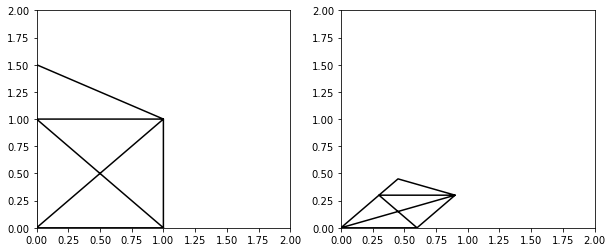

In [15]:
fig,ax1,ax2=transf(casa,A*casa)#,facecolor2='lightsteelblue')#'cornflowerblue')
#animaciones3d(fig,(ax1,)) 